In [1]:
import numpy as np
import importlib
import warnings
warnings.filterwarnings("ignore")

import PricingModel as pm
import Marketpriceplot as mp
import helpers as hl
importlib.reload(pm)
importlib.reload(mp)
importlib.reload(hl)

from matplotlib import cm
import matplotlib.pyplot as plt

maturities = mp.maturities
strikes = mp.strikes
market_prices = mp.option_prices

In [ ]:
mp.xyz_plot('Call')

maturity_years = maturities / 365
market_prices = mp.option_prices

T_days = mp.maturities[3]
T = maturity_years[3]
K = mp.strikes[5]
c = mp.option_prices[3][5]

In [ ]:
S0 = 190.3
r = 0.0245
q = 0.05

alpha = 1.5
eta = 0.2
n = 12

model = 'Heston'

In [11]:
# starting point 
 #[ 2.5     0.05    0.0875 -0.55    0.05  ]

ind_iter = 1
rmseMin = 1.0e6
maturity_years = maturities / 365

for kappa in np.linspace(2.5, 3.2, 3):
    for theta in np.linspace(0.05, 0.125, 3):
        for sig in np.linspace(0.075, 0.095, 3):
            for rho in np.linspace(-0.65, -0.45, 3):
                for v0 in np.linspace(0.04, 0.06, 3):
                    params = [kappa, theta, sig, rho, v0]
                    
                    print(f' i = {ind_iter}')
                    ind_iter += 1
                    print(params)
                    
                    rmse = hl.evalues(params, market_prices, maturity_years, strikes, S0, r, q, model, alpha, eta, n)
                                      
                    if rmse < rmseMin:
                        rmseMin = rmse
                        params2 = params
                        print('\nnew min found')
                        print(np.round(rmseMin, 4))
                        print(params2)

print('\n Solution of Grid Search')
print(params2)
print(f'optimal rmse = {np.round(rmseMin, 4)}')

 i = 1
[2.5, 0.05, 0.075, -0.65, 0.04]

new min found
4.4051
[2.5, 0.05, 0.075, -0.65, 0.04]
 i = 2
[2.5, 0.05, 0.075, -0.65, 0.05]

new min found
4.0576
[2.5, 0.05, 0.075, -0.65, 0.05]
 i = 3
[2.5, 0.05, 0.075, -0.65, 0.06]

new min found
3.7604
[2.5, 0.05, 0.075, -0.65, 0.06]
 i = 4
[2.5, 0.05, 0.075, -0.55, 0.04]
 i = 5
[2.5, 0.05, 0.075, -0.55, 0.05]
 i = 6
[2.5, 0.05, 0.075, -0.55, 0.06]

new min found
3.7524
[2.5, 0.05, 0.075, -0.55, 0.06]
 i = 7
[2.5, 0.05, 0.075, -0.45, 0.04]
 i = 8
[2.5, 0.05, 0.075, -0.45, 0.05]
 i = 9
[2.5, 0.05, 0.075, -0.45, 0.06]

new min found
3.7445
[2.5, 0.05, 0.075, -0.45, 0.06]
 i = 10
[2.5, 0.05, 0.08499999999999999, -0.65, 0.04]
 i = 11
[2.5, 0.05, 0.08499999999999999, -0.65, 0.05]
 i = 12
[2.5, 0.05, 0.08499999999999999, -0.65, 0.06]
 i = 13
[2.5, 0.05, 0.08499999999999999, -0.55, 0.04]
 i = 14
[2.5, 0.05, 0.08499999999999999, -0.55, 0.05]
 i = 15
[2.5, 0.05, 0.08499999999999999, -0.55, 0.06]
 i = 16
[2.5, 0.05, 0.08499999999999999, -0.45, 0.04]
 

In [33]:
model = 'Heston'
T_days = mp.maturities[8]
T = maturity_years[8]
K = mp.strikes[12]
c = mp.option_prices[8][12]

S0 = 190.3
r = 0.0245
q = 0.05 

alpha = 1.5
eta = 0.2
n = 12

Market_Price = c

params = [2.5, 0.125, 0.095, -0.65, 0.04]     

km, C_t = pm.price_fft(S0, r, q, T, model, params, K, alpha, eta, n)
Grid_Model = C_t[0]


print(f' For K = {K}, T = {T_days}')
print(f' {model} Parameters from grid Search : {params}')
print(f'\n Call price using Grid Search parameters : {np.round(Grid_Model, 4)}')
print(f' RMSE : {np.round(rmseMin, 4)}')
print(f'\n Market Price : {Market_Price}')

difff = abs(Grid_Model - Market_Price)

print(f'\n difference between Model vs Market price : {np.round(difff, 4)}')


 For K = 200.0, T = 697
 Heston Parameters from grid Search : [2.5, 0.125, 0.095, -0.65, 0.04]

 Call price using Grid Search parameters : 24.0776
 RMSE : 1.4114

 Market Price : 21.625

 difference between Model vs Market price : 2.4526


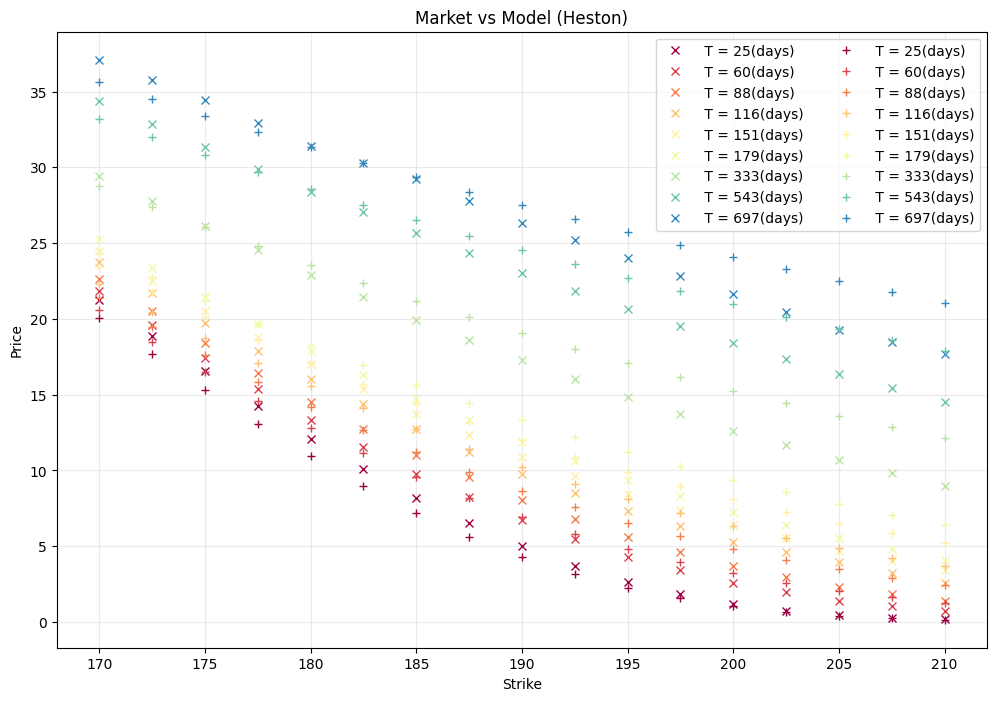

In [35]:
len_K = len(strikes)
len_T = len(maturities)
model_price = np.zeros((len_T, len_K))


for i in range(len_T):
    for j in range(len_K):
        T = maturity_years[i]
        K = strikes[j]
        [km, CT_km] = pm.price_fft(S0, r, q, T, model, params, K, alpha, eta, n)
        model_price[i, j] = CT_km[0]

from cycler import cycler

fig = plt.figure(figsize = (12, 8))
colormap = cm.Spectral
ax = plt.gca()
ax.set_prop_cycle(cycler(color = [colormap(i) for i in np.linspace(0.0, 0.9, (len_T))]))

for i in range(len_T):
    ax.plot(strikes, market_prices[i, :], 'x', label = f' T = {maturities[i]}(days)')

for i in range(len_T):
    ax.plot(strikes, model_price[i, :], '+', label = f' T = {maturities[i]}(days)')


plt.grid(alpha=0.25)
plt.legend(ncol = 2)
plt.xlabel('Strike')
#plt.ylim(0.0, 40)
plt.ylabel('Price')
plt.title('Market vs Model (Heston)')
plt.savefig('MarketvsModel_GridSearch.png')
plt.show() 


Maturity (days) | RMSE
----------------------
    25          | 0.8142
    60          | 0.6578
    88          | 0.8687
   116          | 0.8684
   151          | 1.2451
   179          | 1.5401
   333          | 1.9701
   543          | 1.9450
   697          | 1.9332
170.0              | 1.1791
172.5              | 0.9909
175.0              | 0.7834
177.5              | 0.6182
180.0              | 0.5331
182.5              | 0.5847
185.0              | 0.7191
187.5              | 0.8771
190.0              | 1.1155
192.5              | 1.2678
195.0              | 1.4777
197.5              | 1.6248
200.0              | 1.8229
202.5              | 1.9348
205.0              | 2.0928
207.5              | 2.1349
210.0              | 2.2146


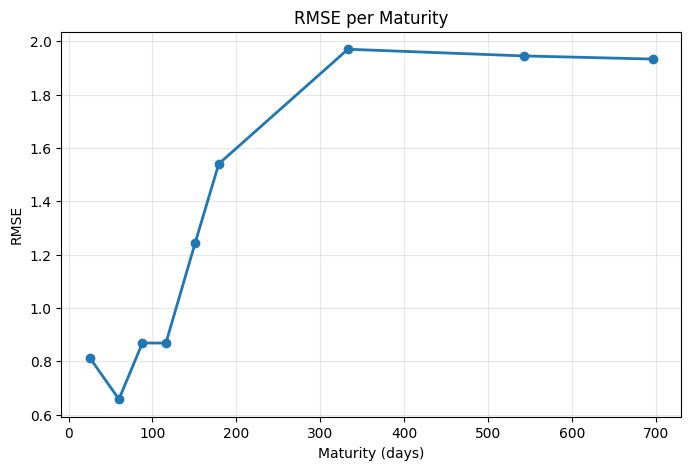

In [37]:

import numpy as np

rmse_per_maturity = np.zeros(len_T)

for i in range(len_T):
    diff = model_price[i, :] - market_prices[i, :]
    rmse_per_maturity[i] = np.sqrt(np.mean(diff**2))

print("Maturity (days) | RMSE")
print("----------------------")
for i in range(len_T):
    print(f"{maturities[i]:>6}          | {rmse_per_maturity[i]:.4f}")

rmse_per_strike = np.zeros(len_K)
for j in range(len_K):
    diff = model_price[:, j] - market_prices[:, j]
    rmse_per_strike[j] = np.sqrt(np.mean(diff**2))

for j in range(len_K):
    print(f'{strikes[j]:>4}              | {rmse_per_strike[j]:.4f}')

plt.figure(figsize=(8, 5))
plt.plot(maturities, rmse_per_maturity, 'o-', lw=2)
plt.xlabel('Maturity (days)')
plt.ylabel('RMSE')
plt.title('RMSE per Maturity')
plt.grid(alpha=0.3)
plt.show()


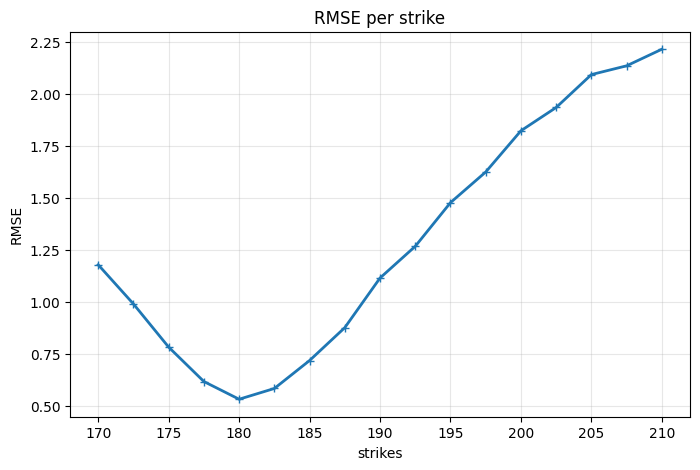

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(strikes, rmse_per_strike, '+-', lw=2)
plt.xlabel('strikes')
plt.ylabel('RMSE')
plt.title('RMSE per strike')
plt.grid(alpha=0.3)
plt.show()

Variance Gamma model

In [43]:
S0 = 190.3
r = 0.0245
q = 0.05

alpha = 1.5
eta = 0.2
n = 12

model = 'VG'

In [45]:
#param1 = (0.15, 0.25, 0.12)
#param2 = (0.25, 0.35, 0.4)

#param1 = (0.35, 0.15, 0.4)
#param2 = (0.4, 0.25, 0.2)

param1 = (0.25, 0.45, -0.2)
param2 = (0.35, 0.15, -0.4)

#param1 = (0.4, 0.36, -0.5)
#param2 = (0.31, 0.49, -0.3)


In [47]:
iArray = []
rmseArray = []
rmseMin = 1.0e6

for i in np.arange(0, 1.5, 0.05):
    params = i * np.array(param1) + ( 1 - i) * np.array(param2)
    iArray.append(i)
    
    rmse = hl.evalues(params, market_prices, maturity_years, strikes, S0, r, q, model, alpha, eta, n)
    rmseArray.append(rmse)
    
    if rmse < rmseMin:
        rmseMin = rmse
        optimal_param = params

print(rmseMin)
print(optimal_param)

1.23354232782125
[ 0.28  0.36 -0.26]


In [49]:
ind_iter = 1
rmseMin = 1.0e6

for sig in np.linspace(0.25, 0.35, 5):
    for nu in np.linspace(0.46, 0.56, 5):
        for theta in np.linspace(-0.2, -0.35, 5):
            params = [sig, nu, theta]
            
            print(f'i = {ind_iter}')
            ind_iter += 1
            print(params)
            
            rmse = hl.evalues(params, market_prices, maturity_years, strikes, S0, r, q, model, alpha, eta, n)
            if rmse < rmseMin:
                rmseMin = rmse
                optimal_param = params
                print('\n new min found')
                print(np.round(rmseMin, 4))
                print(optimal_param)

print('\n Solution found')
print(np.round(rmseMin, 4))
print(optimal_param)
                

i = 1
[0.25, 0.46, -0.2]

 new min found
2.3239
[0.25, 0.46, -0.2]
i = 2
[0.25, 0.46, -0.2375]

 new min found
1.9007
[0.25, 0.46, -0.2375]
i = 3
[0.25, 0.46, -0.275]

 new min found
1.4765
[0.25, 0.46, -0.275]
i = 4
[0.25, 0.46, -0.3125]

 new min found
1.1715
[0.25, 0.46, -0.3125]
i = 5
[0.25, 0.46, -0.35]
i = 6
[0.25, 0.48500000000000004, -0.2]
i = 7
[0.25, 0.48500000000000004, -0.2375]
i = 8
[0.25, 0.48500000000000004, -0.275]
i = 9
[0.25, 0.48500000000000004, -0.3125]

 new min found
1.1376
[0.25, 0.48500000000000004, -0.3125]
i = 10
[0.25, 0.48500000000000004, -0.35]
i = 11
[0.25, 0.51, -0.2]
i = 12
[0.25, 0.51, -0.2375]
i = 13
[0.25, 0.51, -0.275]
i = 14
[0.25, 0.51, -0.3125]

 new min found
1.1093
[0.25, 0.51, -0.3125]
i = 15
[0.25, 0.51, -0.35]
i = 16
[0.25, 0.535, -0.2]
i = 17
[0.25, 0.535, -0.2375]
i = 18
[0.25, 0.535, -0.275]
i = 19
[0.25, 0.535, -0.3125]

 new min found
1.0865
[0.25, 0.535, -0.3125]
i = 20
[0.25, 0.535, -0.35]
i = 21
[0.25, 0.56, -0.2]
i = 22
[0.25, 0.56, 

In [53]:
model = 'VG'

S0 = 190.3
r = 0.0245
q = 0.05 

T_days = mp.maturities[8]
T = maturity_years[8]
K = mp.strikes[12]
c = mp.option_prices[8][12]

alpha = 1.5
eta = 0.2
n = 12

Market_Price = c

params =[ 0.275, 0.56, -0.275] #[0.275, 0.56, -0.275] #[0.26, 0.5, -0.3]

km, C_t = pm.price_fft(S0, r, q, T, model, params, K, alpha, eta, n)
Grid_Model = C_t[0]
plot_p = C_t

print(f' {model} Parameters from grid Search : {params}')
print(f' Call price using Grid Search parameters : {np.round(Grid_Model, 4)}')
print(f' Market Price : {Market_Price}')

difff = abs(Grid_Model - Market_Price)

print(f' difference between Model vs Market price : {np.round(difff, 4)}')

 VG Parameters from grid Search : [0.275, 0.56, -0.275]
 Call price using Grid Search parameters : 21.3304
 Market Price : 21.625
 difference between Model vs Market price : 0.2946


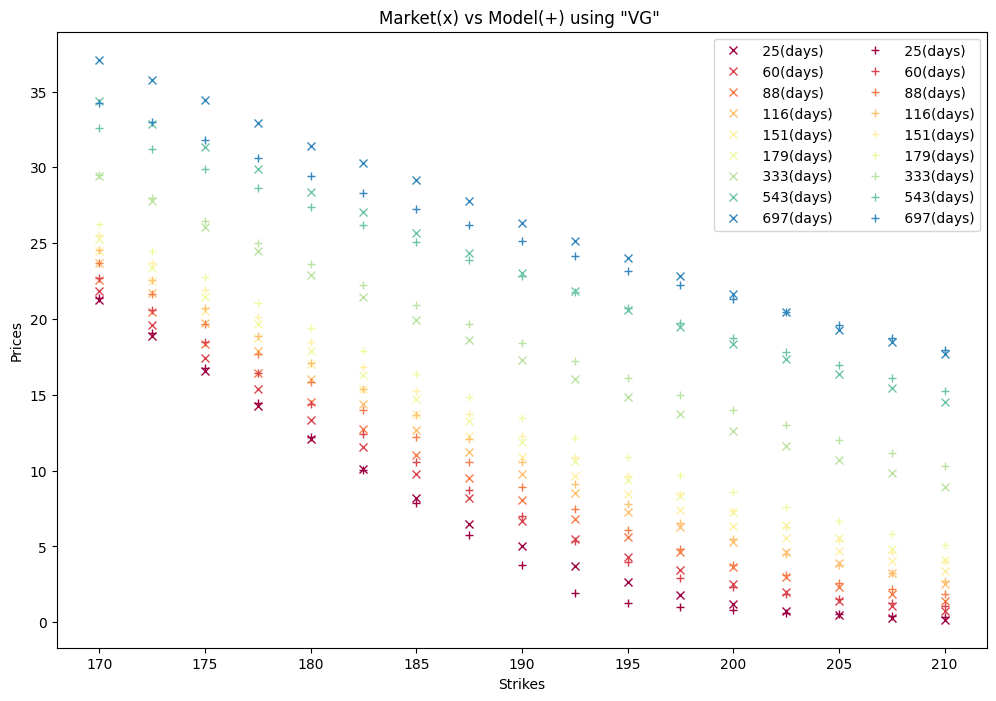

In [55]:
len_T = len(maturities)
len_K = len(strikes)

model_prices = np.zeros((len_T, len_K))

for i in range(len_T):
    for j in range(len_K):
        T = maturity_years[i]
        K = strikes[j]
        [km, CT_km] = pm.price_fft(S0, r, q, T, model, params, K, alpha, eta, n)
        model_prices[i, j] = CT_km[0]

fig = plt.figure(figsize = (12, 8))
ax = plt.gca()
colormap = cm.Spectral

from cycler import cycler

ax.set_prop_cycle(cycler(color = [colormap(i) for i in np.linspace(0.0, 0.9, len_T)]))

for i in range(len_T):
    ax.plot(strikes, market_prices[i, :], 'x', label = f' {maturities[i]}(days)')

for i in range(len_T):
    ax.plot(strikes, model_prices[i, :], '+', label = f' {maturities[i]}(days)')

plt.xlabel('Strikes')
plt.ylabel('Prices')
plt.legend(ncol = 2)
plt.title('Market(x) vs Model(+) using "VG" ')
plt.savefig('Market_vs_Model_using_VG.png')
plt.show()
